In [1]:
pwd

'/gpfs/alpine/bif135/proj-shared/rbd_work/dask_testing/md_simulations'

In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import cm
import numpy as np

In [3]:
with open('results_dictionary.pkl','rb') as in_pickle:
    results_dict = pickle.load(in_pickle)
print(results_dict.keys())
print(results_dict['001_node/timings.csv']['worker_between_overhead'])
print(results_dict['001_node/timings.csv'].keys())
#print(results_dict['double_dask/timings1.csv'])
#print(np.mean(results_dict['subset2_08nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_08nodes']['client_start_overhead'][0]))

dict_keys(['001_node/timings.csv', '002_node/timings.csv', '045_node/timings.csv', '1000_node/timings.csv', '1500_node_18000_tasks/timings.csv', '500_node/timings.csv', '921_node/timings.csv', 'double_dask/timings1.csv', 'double_dask/timings2.csv', 'double_dask_1000_nodes/timings1.csv', 'double_dask_1000_nodes/timings2.csv', 'quad_dask_2000_nodes/timings1.csv', 'quad_dask_2000_nodes/timings2.csv', 'quad_dask_2000_nodes/timings3.csv', 'quad_dask_2000_nodes/timings4.csv'])
[0.0029108524322509766, 0.0031664371490478516, 0.002582073211669922, 0.002857685089111328, 0.0030629634857177734, 0.002548694610595703]
dict_keys(['batch_start', 'batch_end', 'client_start', 'client_end', 'total_time', 'worker_task_times', 'worker_start_overhead', 'worker_idle_times', 'worker_between_overhead', 'stop_overhead'])


In [4]:
# strong scaling image: 

#min_time = 999999
#max_time = 0

single_keys = [[1,'001_node/timings.csv'],
               [2,'002_node/timings.csv'],
               [45,'045_node/timings.csv'],
               [500,'500_node/timings.csv'],
               #[921,'921_node/timings.csv'],
               [1000,'1000_node/timings.csv'],
               [1500,'1500_node_18000_tasks/timings.csv']]
single_timing = []
for key in single_keys:
    single_timing.append([key[0], 
                          key[0]*6, 
                          results_dict[key[1]]['total_time'],
                          np.mean(results_dict[key[1]]['worker_task_times']),
                          np.std(results_dict[key[1]]['worker_task_times']),
                          np.mean(results_dict[key[1]]['worker_start_overhead']),
                          np.std(results_dict[key[1]]['worker_start_overhead']),
                          np.mean(results_dict[key[1]]['worker_idle_times']),
                          np.std(results_dict[key[1]]['worker_idle_times']),
                          np.mean(results_dict[key[1]]['worker_between_overhead']),
                          np.std(results_dict[key[1]]['worker_between_overhead']),
                          len(results_dict[key[1]]['worker_task_times'])])

#    if np.min(results_dict[key[1]]['worker_task_times']) < min_time:
#        min_time = np.min(results_dict[key[1]]['worker_task_times'])
#    if np.max(results_dict[key[1]]['worker_task_times']) > max_time:
#        max_time = np.max(results_dict[key[1]]['worker_task_times'])

single_timing = np.array(single_timing)


multiple_keys = [[10,['double_dask/timings1.csv','double_dask/timings2.csv']],
                 [1000,['double_dask_1000_nodes/timings1.csv', 'double_dask_1000_nodes/timings2.csv']],
                 [2000,['quad_dask_2000_nodes/timings1.csv', 'quad_dask_2000_nodes/timings2.csv', 'quad_dask_2000_nodes/timings3.csv', 'quad_dask_2000_nodes/timings4.csv']]]
multiple_timing = []
for key in multiple_keys:
    all_results = [key[0],
                   key[0]*6]
    total_time_max = np.max([results_dict[elem]['total_time'] for elem in key[1]])
    all_results += [total_time_max]
    
    strings = ['worker_task_times','worker_start_overhead','worker_idle_times','worker_between_overhead']
    for dict_string in strings:
        temp = []
        for elem in key[1]:
            temp += results_dict[elem][dict_string]
        all_results += [np.mean(temp),np.std(temp)]
    all_results += [len(temp)*3]
    multiple_timing.append(all_results)
    
#    multiple_timing.append([key[0],np.mean(temp),np.std(temp),len(temp)])
#    if np.min(temp) < min_time:
#        min_time = np.min(temp)
#    if np.max(temp) > max_time:
#        max_time = np.max(temp)

multiple_timing = np.array(multiple_timing)
    
#print(single_timing)
#print(multiple_timing)
#print(min_time,max_time)

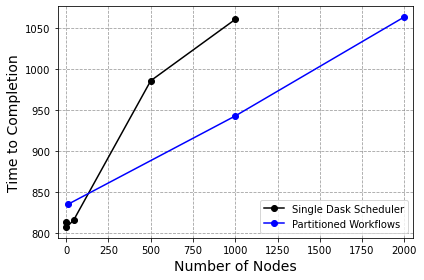

In [5]:
# weak scaling examples - Time to completion vs Number of Nodes
plt.plot(single_timing[:-1,0],single_timing[:-1,2],'ko-',zorder=3,label='Single Dask Scheduler')
plt.plot(multiple_timing[:,0],multiple_timing[:,2],'bo-',zorder=3,label='Partitioned Workflows')
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.xlabel('Number of Nodes',size=14)
plt.ylabel('Time to Completion',size=14)
plt.xlim((-50,2050))
plt.legend()
plt.tight_layout()
plt.savefig('workflow_weak_scaling.png',dpi=600,transparent=True)
plt.show()
plt.close()

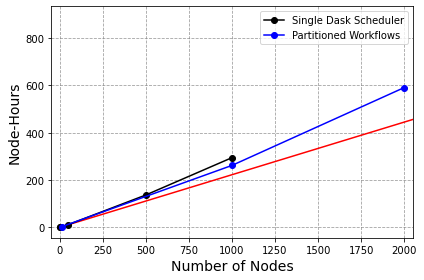

In [6]:
# weak scaling examples - Node-hour vs Number of Nodes
#  single_timing[:-1,2]
plt.plot(single_timing[:-1,0],single_timing[:-1,0]*single_timing[:-1,2]/60./60.,'ko-',zorder=3,label='Single Dask Scheduler')
plt.plot(multiple_timing[:,0],multiple_timing[:,0]*multiple_timing[:,2]/60./60.,'bo-',zorder=3,label='Partitioned Workflows')
# plot linear scale from 1 node to 2:
x = np.linspace(0,4000,num = 50)
m = (single_timing[1,0]*single_timing[1,2] - single_timing[0,0]*single_timing[0,2])/60./60.
b = 0.
y = m*x+b
plt.plot(x,y,'r-',zorder=2)

plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.xlabel('Number of Nodes',size=14)
plt.ylabel('Node-Hours',size=14)
plt.xlim((-50,2050))
#plt.xlim((-50,300))
#plt.ylim((-1,100))
plt.legend()
plt.tight_layout()
plt.savefig('workflow_weak_scaling2.png',dpi=600,transparent=True)
plt.show()
plt.close()

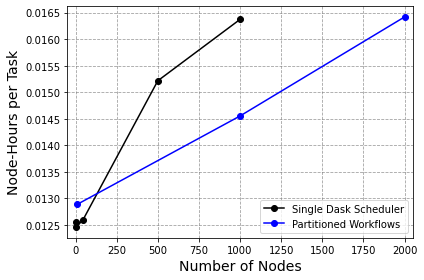

In [138]:
# weak scaling examples - Node-hour per task vs Number of Nodes
#  single_timing[:-1,2]
plt.plot(single_timing[:-1,0],single_timing[:-1,0]*single_timing[:-1,2]/60./60./single_timing[:-1,-1],'ko-',zorder=3,label='Single Dask Scheduler')
plt.plot(multiple_timing[:,0],multiple_timing[:,0]*multiple_timing[:,2]/60./60./multiple_timing[:,-1],'bo-',zorder=3,label='Partitioned Workflows')
# plot linear scale from 1 node to 2:
#x = np.linspace(0,4000,num = 50)
#m = (single_timing[1,0]*single_timing[1,2] - single_timing[0,0]*single_timing[0,2])/60./60.
#b = 0.
#y = m*x+b
#plt.plot(x,y,'r-',zorder=2)

plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.xlabel('Number of Nodes',size=14)
plt.ylabel('Node-Hours per Task',size=14)
plt.xlim((-50,2050))
#plt.xlim((-50,300))
#plt.ylim((-1,100))
plt.legend()
plt.tight_layout()
plt.savefig('workflow_weak_scaling3.png',dpi=600,transparent=True)
plt.show()
plt.close()

In [85]:
# make latex table: 
"""
\begin{table}[htbp]
\begin{center}
\caption{Worker overhead times in seconds.}
\vspace{-0.5cm}
\begin{tabular}{ccccc}
    \toprule
     Nodes     & Average Task & \multirow{2}{*}{Start} & \multirow{2}{*}{End} & Between\\
     (Workers) & Time         & &                                             & Task \\
    \midrule
"""
table_string = ""
for result in single_timing:
    table_string += f" {int(result[0])} ({int(result[1])}) & {result[3]} $\pm$ {result[4]} & {result[5]} $\pm$ {result[6]} & {result[7]} $\pm$ {result[8]} & {result[9]} $\pm$ {result[10]}\n"

table_string += '\midrule\n'
    
for result in multiple_timing:
    table_string += f" {int(result[0])} ({int(result[1])}) & {result[3]} $\pm$ {result[4]} & {result[5]} $\pm$ {result[6]} & {result[7]} $\pm$ {result[8]} & {result[9]} $\pm$ {result[10]}\n"
print(table_string)  

"""
     \bottomrule
     \multicolumn{4}{l}{\footnotesize{$\dagger$ CPUs provided to the Scheduler were increased to 20 cores to handle}}\\
     \multicolumn{4}{l}{\footnotesize{ the increased communication overhead.}}
\end{tabular}
\label{tab:md_overheads}
\end{center}
%{\footnotesize $\dagger$ CPUs provided to the Scheduler were increased to 20 cores to handle the increased overhead.}
\end{table}"""

 1 (6) & 251.1029972632726 $\pm$ 2.8962478481432576 & 0.583324670791626 $\pm$ 0.00026448845909639274 & 8.440998474756876 $\pm$ 4.0304699539674065 & 0.0028547843297322593 $\pm$ 0.00022791824461676637
 2 (12) & 251.10775083965726 $\pm$ 2.7761988531578337 & 0.5908380548159281 $\pm$ 0.0003808038017425036 & 2.8060836791992188 $\pm$ 1.8221632300642003 & 0.0027728676795959473 $\pm$ 0.00019957268434707694
 45 (270) & 251.4962593955758 $\pm$ 3.7683324180200253 & 1.1169280352415862 $\pm$ 0.008267661317824145 & 8.00722828441196 $\pm$ 2.0303922134366568 & 0.003540837323224103 $\pm$ 0.007981211595882224
 500 (3000) & 262.690577656481 $\pm$ 14.366327567617322 & 17.91171627020836 $\pm$ 0.09289217724760564 & 100.80599167815845 $\pm$ 11.032665101966115 & 0.11973447815577189 $\pm$ 0.1878627887772493
 921 (5526) & 265.131181099976 $\pm$ 19.850073081326713 & 82.28387166829891 $\pm$ 29.059119786237687 & 213.308349795804 $\pm$ 16.832914412601504 & 0.2982263343730268 $\pm$ 0.3350256672969297
 1000 (6000) & 2

'\n     \x08ottomrule\n     \\multicolumn{4}{l}{\x0cootnotesize{$\\dagger$ CPUs provided to the Scheduler were increased to 20 cores to handle}}\\\n     \\multicolumn{4}{l}{\x0cootnotesize{ the increased communication overhead.}}\n\\end{tabular}\n\\label{tab:md_overheads}\n\\end{center}\n%{\x0cootnotesize $\\dagger$ CPUs provided to the Scheduler were increased to 20 cores to handle the increased overhead.}\n\\end{table}'

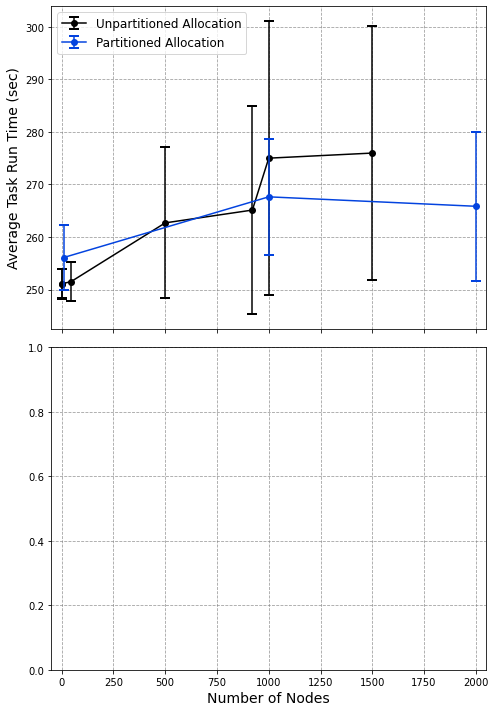

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(7, 10),sharex=True)
axs[0].errorbar(single_timing[:,0],single_timing[:,1],yerr=single_timing[:,2],c='xkcd:black',marker='o',ms=5,mew=2,ecolor='xkcd:black',capsize=5,zorder=3, label = 'Unpartitioned Allocation')
axs[0].errorbar(multiple_timing[:,0],multiple_timing[:,1],yerr=multiple_timing[:,2],c='xkcd:blue',marker='o',ms=5,mew=2,ecolor='xkcd:blue',capsize=5,zorder=4, label = 'Partitioned Allocation')

# labels
axs[0].set_ylabel('Average Task Run Time (sec)',size=14)
#axs[1].set_ylabel('Overhead Times (sec)',size=14)
axs[1].set_xlabel('Number of Nodes',size=14)

axs[0].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
axs[1].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
#axs[2].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)

axs[0].legend(fontsize=12,loc=2)
#axs[1].legend(fontsize=16)

axs[0].set_xlim((-50,2050))
axs[1].set_xlim((-50,2050))

plt.tight_layout()
#plt.savefig(f'scaling_and_overheads.png',dpi=600,transparent=True)
plt.show()
#plt.close()


No handles with labels found to put in legend.


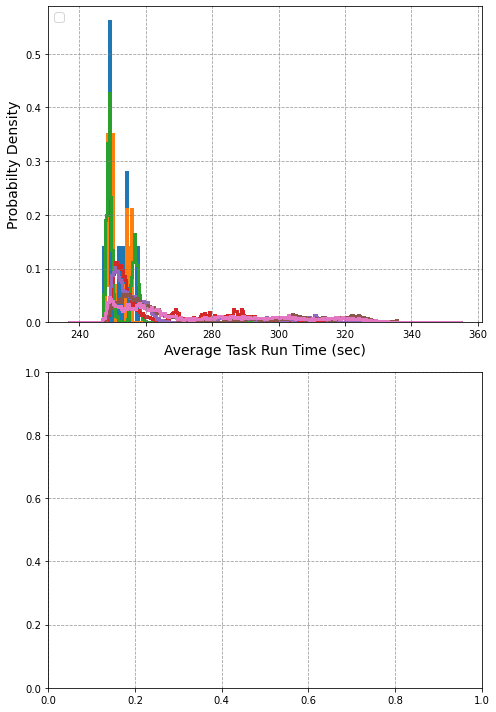

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(7, 10))
bin_edges = np.linspace(min_time-10,max_time+10,num=300,endpoint=True)
for key in single_keys:
    results = axs[0].hist(results_dict[key[1]]['worker_task_times'],bins=bin_edges,histtype='step',density=True,linewidth=3)
    
# labels
axs[0].set_xlabel('Average Task Run Time (sec)',size=14)
#axs[1].set_ylabel('Overhead Times (sec)',size=14)
axs[0].set_ylabel('Probabilty Density',size=14)

axs[0].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
axs[1].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
#axs[2].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)

axs[0].legend(fontsize=12,loc=2)
#axs[1].legend(fontsize=16)

#axs[0].set_xlim((-50,2050))
#axs[1].set_xlim((-50,2050))

plt.tight_layout()
#plt.savefig(f'scaling_and_overheads.png',dpi=600,transparent=True)
plt.show()
#plt.close()


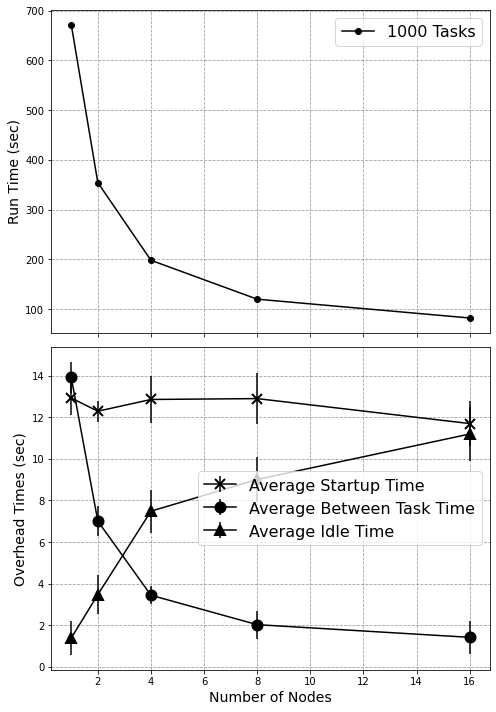

In [90]:
fig, axs = plt.subplots(2, 1, figsize=(7, 10),sharex=True)

# strong scaling image:
timing = np.array([[1,results_dict['subset2_01nodes']['total_time']],
                  [2,results_dict['subset2_02nodes']['total_time']],
                  [4,results_dict['subset2_04nodes']['total_time']],
                  [8,results_dict['subset2_08nodes']['total_time']],
                  [16,results_dict['subset2_16nodes']['total_time']]])

axs[0].plot(timing[:,0],timing[:,1],'ko-',zorder=3, label = '1000 Tasks')

# overhead plots
#timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_01nodes']['client_start_overhead'][0])],
#                   [2,np.mean(results_dict['subset2_02nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_02nodes']['client_start_overhead'][0])],
#                   [4,np.mean(results_dict['subset2_04nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_04nodes']['client_start_overhead'][0])],
#                   [8,np.mean(results_dict['subset2_08nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_08nodes']['client_start_overhead'][0])],
#                   [16,np.mean(results_dict['subset2_16nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_16nodes']['client_start_overhead'][0])]])
#axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='b',marker='x',ms=10,mew=2,ecolor='b',zorder=3, label = 'Average Startup Time')

timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_01nodes']['client_start_overhead'][1])],
                   [2,np.mean(results_dict['subset2_02nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_02nodes']['client_start_overhead'][1])],
                   [4,np.mean(results_dict['subset2_04nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_04nodes']['client_start_overhead'][1])],
                   [8,np.mean(results_dict['subset2_08nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_08nodes']['client_start_overhead'][1])],
                   [16,np.mean(results_dict['subset2_16nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_16nodes']['client_start_overhead'][1])]])
axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='k',marker='x',ms=10,mew=2,ecolor='k',zorder=3, label = 'Average Startup Time')

#timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_01nodes']['worker_between_overhead'][0])],
#                   [2,np.mean(results_dict['subset2_02nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_02nodes']['worker_between_overhead'][0])],
#                   [4,np.mean(results_dict['subset2_04nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_04nodes']['worker_between_overhead'][0])],
#                   [8,np.mean(results_dict['subset2_08nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_08nodes']['worker_between_overhead'][0])],
#                   [16,np.mean(results_dict['subset2_16nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_16nodes']['worker_between_overhead'][0])]])
## CPU workers are idle for the majority of the job; can have a large mean "total between-task time".
#axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='b',marker='o',ms=10,mew=2,ecolor='b',zorder=3, label = 'Average Between Task Time')

timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_01nodes']['worker_between_overhead'][1])],
                   [2,np.mean(results_dict['subset2_02nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_02nodes']['worker_between_overhead'][1])],
                   [4,np.mean(results_dict['subset2_04nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_04nodes']['worker_between_overhead'][1])],
                   [8,np.mean(results_dict['subset2_08nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_08nodes']['worker_between_overhead'][1])],
                   [16,np.mean(results_dict['subset2_16nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_16nodes']['worker_between_overhead'][1])]])
# GPU workers are very rarely idle; small mean "total between-task time".
axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='k',marker='o',ms=10,mew=2,ecolor='k',zorder=3, label = 'Average Between Task Time')

#timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_01nodes']['worker_idle_times'][0])],
#                   [2,np.mean(results_dict['subset2_02nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_02nodes']['worker_idle_times'][0])],
#                   [4,np.mean(results_dict['subset2_04nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_04nodes']['worker_idle_times'][0])],
#                   [8,np.mean(results_dict['subset2_08nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_08nodes']['worker_idle_times'][0])],
#                   [16,np.mean(results_dict['subset2_16nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_16nodes']['worker_idle_times'][0])]])
## CPU workers are idle for the majority of the job; can have a large mean "total between-task time".
#axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='b',marker='^',ms=10,mew=2,ecolor='b',zorder=3, label = 'Average Idle Time')

timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_01nodes']['worker_idle_times'][1])],
                   [2,np.mean(results_dict['subset2_02nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_02nodes']['worker_idle_times'][1])],
                   [4,np.mean(results_dict['subset2_04nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_04nodes']['worker_idle_times'][1])],
                   [8,np.mean(results_dict['subset2_08nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_08nodes']['worker_idle_times'][1])],
                   [16,np.mean(results_dict['subset2_16nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_16nodes']['worker_idle_times'][1])]])
axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='k',marker='^',ms=10,mew=2,ecolor='k',zorder=3, label = 'Average Idle Time')

# labels
axs[0].set_ylabel('Run Time (sec)',size=14)
axs[1].set_ylabel('Overhead Times (sec)',size=14)
axs[1].set_xlabel('Number of Nodes',size=14)

axs[0].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
axs[1].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
#axs[2].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
plt.tight_layout()
plt.savefig(f'scaling_and_overheads.png',dpi=600,transparent=True)
plt.show()
plt.close()